In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/4class_data.csv", header = None)

train = np.array(df.iloc[[0, 1]])
target = np.array(df.iloc[[2]])

In [ ]:
train.shape, target.shape

((2, 40), (1, 40))

Iteration 0, Loss: 1.3852126655522552
Iteration 100, Loss: 1.3714732195116073
Iteration 200, Loss: 1.3585641109268378
Iteration 300, Loss: 1.3461922731416134
Iteration 400, Loss: 1.3342139940305282
Iteration 500, Loss: 1.322557254135476
Iteration 600, Loss: 1.311184316342648
Iteration 700, Loss: 1.3000738272205807
Iteration 800, Loss: 1.289212289903019
Iteration 900, Loss: 1.278590010529098
Iteration 1000, Loss: 1.2681991728194213
Iteration 1100, Loss: 1.2580329235894436
Iteration 1200, Loss: 1.2480849384265273
Iteration 1300, Loss: 1.2383492155371159
Iteration 1400, Loss: 1.2288199780553952
Iteration 1500, Loss: 1.219491627869201
Iteration 1600, Loss: 1.2103587238299707
Iteration 1700, Loss: 1.2014159713987071
Iteration 1800, Loss: 1.1926582175452285
Iteration 1900, Loss: 1.1840804479527647
Iteration 2000, Loss: 1.1756777851306157
Iteration 2100, Loss: 1.1674454867825936
Iteration 2200, Loss: 1.1593789441373867
Iteration 2300, Loss: 1.1514736801192424
Iteration 2400, Loss: 1.143725347

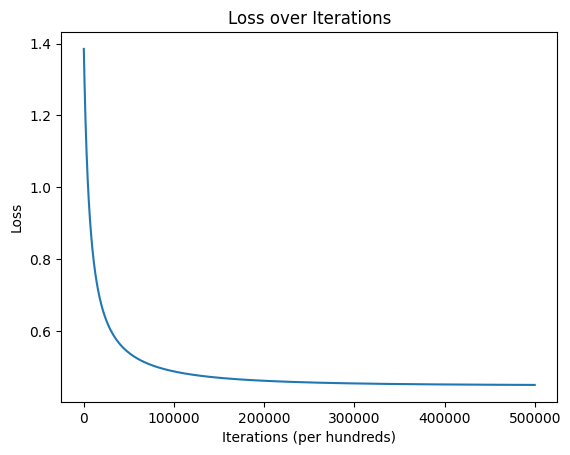

Predictions: [0 0 0 0 0 0 1 2 0 0 0 1 2 1 1 1 1 1 3 1 0 1 2 2 2 2 2 2 2 3 2 1 3 3 3 3 3
 3 3 3]
Actual: [[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3
  3 3 3 3]]


<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 주어진 데이터
train_data = np.array(df.iloc[[0, 1]])
target_data = np.array(df.iloc[[2]]).astype(np.uint8)

# 네트워크 정의
def initialize_parameters(input_dim, output_dim):
    np.random.seed(42)
    W = np.random.randn(output_dim, input_dim) * 0.01
    b = np.zeros((output_dim, 1))
    return W, b

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / np.sum(expZ, axis=0, keepdims=True)

def forward_propagation(X, W, b):
    Z = np.dot(W, X) + b
    A = softmax(Z)
    return A

def compute_loss(A, Y):
    m = Y.shape[1]
    loss = -1/m * np.sum(Y * np.log(A + 1e-8))  # 로그 안에 0이 들어가지 않도록 아주 작은 값 더해줌
    return loss

def backward_propagation(X, A, Y):
    m = X.shape[1]
    dZ = A - Y
    dW = 1/m * np.dot(dZ, X.T)
    db = 1/m * np.sum(dZ, axis=1, keepdims=True)
    return dW, db

def update_parameters(W, b, dW, db, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return W, b

def plot_loss(losses):
    plt.plot(losses)
    plt.xlabel('Iterations (per hundreds)')
    plt.ylabel('Loss')
    plt.title('Loss over Iterations')
    plt.show()
    plt.savefig('loss.png')

def one_hot_encode(labels, num_classes):
    num_labels = labels.shape[1]
    one_hot = np.zeros((num_classes, num_labels))
    one_hot[labels.flatten(), np.arange(num_labels)] = 1
    return one_hot

def train(train_data, target_data, num_iterations, learning_rate):
    input_dim = train_data.shape[0]
    output_dim = np.max(target_data) + 1  # 클래스 개수는 레이블 중 가장 큰 값 + 1
    target_one_hot = one_hot_encode(target_data, output_dim)

    W, b = initialize_parameters(input_dim, output_dim)
    loss_arr = []
    for i in range(num_iterations):
        # Forward Propagation
        A = forward_propagation(train_data, W, b)

        # Compute Loss
        loss = compute_loss(A, target_one_hot)
        loss_arr.append(loss)

        # Backward Propagation
        dW, db = backward_propagation(train_data, A, target_one_hot)

        # Update Parameters
        W, b = update_parameters(W, b, dW, db, learning_rate)

        if i % 100 == 0:
            print(f'Iteration {i}, Loss: {loss}')

    plot_loss(loss_arr)
    return W, b

# 학습
num_iterations = 500000
learning_rate = 0.01

W, b = train(train_data, target_data, num_iterations, learning_rate)

# 학습된 파라미터로 예측
def predict(X, W, b):
    A = forward_propagation(X, W, b)
    predictions = np.argmax(A, axis=0)
    return predictions

# 예측
predictions_arr = []
predictions = predict(train_data, W, b)
predictions_arr.append(predictions)
print("Predictions:", predictions)
print("Actual:", target_data)

In [ ]:
predictions_arr = np.array(predictions_arr)
predict = predictions_arr.flatten()
actual = target_data.flatten()

corret_num = 0
miss_num = 0;
for i in range(len(predict)):
  if predict[i] == actual[i]:
    corret_num += 1
  else:
    miss_num += 1

print(miss_num)

10
